# TP2 - RATNAMOGAN Pirashanth

# Language Models
### Authors: Rachid Riad, Julien Karadayi, Emmanuel Dupoux
#### Goals: 
- Small exercice and vizualizations with Weigthed Finite State Transducers
- Implementation: Edit Distance/Levenshtein with Finite State Transducers 
- Going Further with Composition of FSTs: Detect mispelled words/Generate candidate words 
- The basics of `Kaldi/Abkhazia` ASR tool, different language models, dictionnary

#### Dataset:
- Dictionary
- Librispeech

#### Softwares:
- Openfst/Pywrapfst
- Kaldi/Abkhazia


In [48]:
%matplotlib inline 
# display figures in the notebook
import matplotlib.pyplot as plt
import os
import subprocess

import pywrapfst as fst

### I) Openfst / Pywrapfst
The OpenFst library is a C++ template library. It is a library for constructing, combining, optimizing, and searching weighted finite-state transducers (FSTs) The C++ code is used in many speech applications, and has been developped by NYU Courant Institute and Google Research. 

A link to the C++ api and the possible operations http://www.openfst.org/twiki/bin/view/FST/FstQuickTour#CreatingFsts

#### Exercice 1) Basic operations on Finite State Transducers (FSTs)

a) Build a finite state transducer that converts a sequence in Upercase to Lowercase with input vocubaluary $\Sigma = \{A,B\}$, and output vocabulary $\Omega = \{a,b\}$

b) Now, you want to to be able to handle, in addition to $\Sigma = \{A,B\}$, extra symbols in your input sequence such as $\{@,a,b,!,1,2,\_,-,\}$ how to modify the precedent transducer to do so?

c) Use the **Union** operation to answer the previous question.

d) You do not want to support anymore the numeric characters, $ \{1,2\}$, remove them with the **Difference** operation between two chosen FSTs.

e) Now, you want to go directly from $\Sigma = \{A,B\}$ to $\Delta = \{\alpha,\beta\}$, use the **Composition ** operation, a previous built FST a new one to have such a FST.

This is the handing for the MVA master student **Pirashanth RATNAMOGAN**

# Exercice 1 

a) I have build a finite state unweighted transducer that basically take as input the vocabulary A or B and return its lowercase version

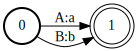

In [49]:
phone_table = fst.SymbolTable(name='phones')
word_table = fst.SymbolTable(name='words')
phones = ['b','a']
words = ['A','B']
         
for idx,phone in enumerate(phones):
    phone_table.add_symbol(symbol=phone,key=idx)
    print phone_table.find(idx),idx

for idx,word in enumerate(words):
    word_table.add_symbol(symbol=word,key=idx)
    print word_table.find(idx),idx

fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

print >> fr_model_tranducer_compiler, "0 1 0 1"
print >> fr_model_tranducer_compiler, "0 1 1 0"
print >> fr_model_tranducer_compiler, "1"


f = fr_model_tranducer_compiler.compile()
f.set_input_symbols(word_table)
f.set_output_symbols(phone_table)


b) We want to add the extra symbols $\{@,a,b,!,1,2,\_,-,\}$ as input to our transducer. The transducer goal is to convert uppercase to lowercase hence those extra symbols will be invariant to our transducer.
We can manually add them to our FST. (next question with union).

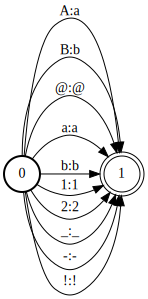

In [50]:
phone_table = fst.SymbolTable(name='phones')
word_table = fst.SymbolTable(name='words')
phones = ['b','a','@','1','2','_','-','!']
words = ['A','B','@','a','b','1','2','_','-','!']
         
for idx,phone in enumerate(phones):
    phone_table.add_symbol(symbol=phone,key=idx)

for idx,word in enumerate(words):
    word_table.add_symbol(symbol=word,key=idx)

fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

print >> fr_model_tranducer_compiler, "0 1 0 1"
print >> fr_model_tranducer_compiler, "0 1 1 0"
print >> fr_model_tranducer_compiler, "0 1 2 2"
print >> fr_model_tranducer_compiler, "0 1 3 1"
print >> fr_model_tranducer_compiler, "0 1 4 0"
print >> fr_model_tranducer_compiler, "0 1 5 3"
print >> fr_model_tranducer_compiler, "0 1 6 4"
print >> fr_model_tranducer_compiler, "0 1 7 5"
print >> fr_model_tranducer_compiler, "0 1 8 6"
print >> fr_model_tranducer_compiler, "0 1 9 7"
print >> fr_model_tranducer_compiler, "1"


f_full = fr_model_tranducer_compiler.compile()
f_full.set_input_symbols(word_table)
f_full.set_output_symbols(phone_table)



c) We can do the same operation using the **Union** operator

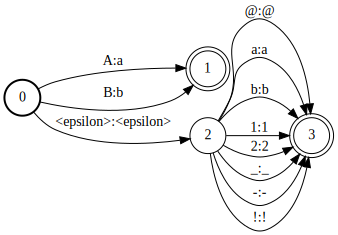

In [51]:
##First we will create two separated graph 
phone_table = fst.SymbolTable(name='phones')
word_table = fst.SymbolTable(name='words')
phones = ['<epsilon>','b','a','@','1','2','_','-','!']
words = ['<epsilon>','A','B','@','a','b','1','2','_','-','!']
         
for idx,phone in enumerate(phones):
    phone_table.add_symbol(symbol=phone,key=idx)

for idx,word in enumerate(words):
    word_table.add_symbol(symbol=word,key=idx)
    
f_invar_compiler = fst.Compiler(acceptor=False)

print >> f_invar_compiler, "0 1 3 3"
print >> f_invar_compiler, "0 1 4 2"
print >> f_invar_compiler, "0 1 5 1"
print >> f_invar_compiler, "0 1 6 4"
print >> f_invar_compiler, "0 1 7 5"
print >> f_invar_compiler, "0 1 8 6"
print >> f_invar_compiler, "0 1 9 7"
print >> f_invar_compiler, "0 1 10 8"
print >> f_invar_compiler, "1"


f_invar = f_invar_compiler.compile()
f_invar.set_input_symbols(word_table)
f_invar.set_output_symbols(phone_table)

fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

print >> fr_model_tranducer_compiler, "0 1 1 2"
print >> fr_model_tranducer_compiler, "0 1 2 1"
print >> fr_model_tranducer_compiler, "1"


f_init = fr_model_tranducer_compiler.compile()
f_init.set_input_symbols(word_table)
f_init.set_output_symbols(phone_table)

f_union = f_init.copy()
f_union.union(f_invar)



d) Using the Difference operator we can remove 1 and 2 from the invariant graph before doing the union (it was impossible the do the difference on the transducer directly). 

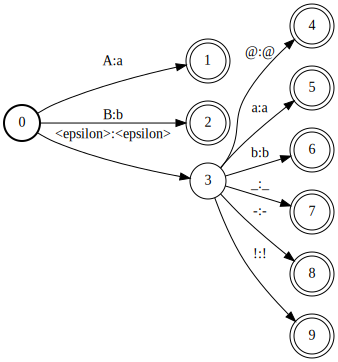

In [53]:
##First we will create two separated graph 
phone_table = fst.SymbolTable(name='phones')
word_table = fst.SymbolTable(name='words')
phones = ['<epsilon>','b','a','@','1','2','_','-','!']
words = ['<epsilon>','A','B','@','a','b','1','2','_','-','!']
         
for idx,phone in enumerate(phones):
    phone_table.add_symbol(symbol=phone,key=idx)

for idx,word in enumerate(words):
    word_table.add_symbol(symbol=word,key=idx)
    
f_invar_compiler = fst.Compiler(acceptor=True)

print >> f_invar_compiler, "0 1 3"
print >> f_invar_compiler, "0 2 4"
print >> f_invar_compiler, "0 3 5"
print >> f_invar_compiler, "0 4 6"
print >> f_invar_compiler, "0 5 7"
print >> f_invar_compiler, "0 6 8"
print >> f_invar_compiler, "0 7 9"
print >> f_invar_compiler, "0 8 10"
print >> f_invar_compiler, "1"
print >> f_invar_compiler, "2"
print >> f_invar_compiler, "3"
print >> f_invar_compiler, "4"
print >> f_invar_compiler, "5"
print >> f_invar_compiler, "6"
print >> f_invar_compiler, "7"
print >> f_invar_compiler, "8"

f_invar = f_invar_compiler.compile()
f_invar.set_input_symbols(word_table)
#f_invar.set_output_symbols(phone_table)

fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

print >> fr_model_tranducer_compiler, "0 1 1 4"
print >> fr_model_tranducer_compiler, "0 2 2 5"
print >> fr_model_tranducer_compiler, "1"
print >> fr_model_tranducer_compiler, "2"

                                           
f_init = fr_model_tranducer_compiler.compile()
f_init.set_input_symbols(word_table)
f_init.set_output_symbols(word_table)

#f_union = f_init.copy()
#f_union.union(f_invar)

fr_model_tranducer_compiler = fst.Compiler(acceptor=True)

print >> fr_model_tranducer_compiler, "0 1 7"
print >> fr_model_tranducer_compiler, "0 2 6"
print >> fr_model_tranducer_compiler, "1"
print >> fr_model_tranducer_compiler, "2"


f3 = fr_model_tranducer_compiler.compile()
f3.set_input_symbols(word_table)
#f3.set_output_symbols(phone_table)

f2_deterministic = f3.copy()
f2_deterministic = fst.determinize(f2_deterministic)

a =fst.difference(f_invar,f2_deterministic)
a.set_input_symbols(word_table)
a.set_output_symbols(word_table)

f_union = f_init.copy()
f_union.union(a)

e) Here I'm doing the required composition.

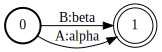

In [54]:
first_phones = fst.SymbolTable(name='phones')
first_words = fst.SymbolTable(name='words')
phones = ['0','a','b']
words = ['0','B','A']
         
for idx,phone in enumerate(phones):
    first_phones.add_symbol(symbol=phone,key=idx)

for idx,word in enumerate(words):
    first_words.add_symbol(symbol=word,key=idx)
    
    
second_phones = fst.SymbolTable(name='phones')
second_words = fst.SymbolTable(name='words')    
phones = ['0','alpha','beta']
words= ['0','a','b']
for idx,phone in enumerate(phones):
    second_phones.add_symbol(symbol=phone,key=idx)

for idx,word in enumerate(words):
    second_words.add_symbol(symbol=word,key=idx)

    
fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

print >> fr_model_tranducer_compiler, "0 1 1 2"
print >> fr_model_tranducer_compiler, "0 1 2 1"
print >> fr_model_tranducer_compiler, "1"


f = fr_model_tranducer_compiler.compile()
f.set_input_symbols(first_words)
f.set_output_symbols(first_phones)

fr_model_tranducer_compiler = fst.Compiler(acceptor=False)
print >> fr_model_tranducer_compiler, "0 1 1 1"
print >> fr_model_tranducer_compiler, "0 1 2 2"
print >> fr_model_tranducer_compiler, "1"



f2= fr_model_tranducer_compiler.compile()
f2.set_input_symbols(second_words)
f2.set_output_symbols(second_phones)

a =fst.compose(f,f2)
a


#### Exercice 2) Edit Distance and Weighted Finite State Transducers (WFSTs)

It is possible to compute the usual [Levenshtein distance or Edit Distance](https://en.wikipedia.org/wiki/Levenshtein_distance) with Weighted Finite State Transducers. 
In the cell below, it is an example of the operations to compute the Edit Distance with only additions taken into account for basic sequences from this Vocabulary $\Sigma = \{0,1\}$. You use the composition twice: $ S_1 \circ EditFST \circ S_2$. You obtain the Graph FST of all possible paths to go from one sequence to the other. Then you use the shortest path to obtain the Edit Distance.

a) In this part the vocabulary of the Language is $\Sigma = \{h,o,m,l,a,c, g\}$. Build a transducer for the **Edit Distance with the additions, substitutions and deletions**. You should use a small code snippet to not type everything by hands. Hint: Introduce some intermediate transitions type. Provide an explanation of the resulting weights and input/output transitions.

Any comments on the occupied memory for the WFST and $|\Sigma|$? Do you have a solution to reduce it? 
You are solving a **shortest-path problem in a graph with non-negative weights** to compute the finale edit distance. In the case of Edit Distance in linguistics, which algorithm should you use ? Justify your choice. 

b) Now, you are provided with a dictionnary of correct words. You want to detect the **misspelled words** in a text. The naive way without FST is to check whether or not each word of a text is present in the words vocabulary. Another way is: 0) Build a FST of your input text where each word is represented by a path 1) Compose your text FST with the dictionnary FST. You obtain only the intersection of the input words and dictonnary words. 2) Use the difference operation between the obtained FST and the input FST to obtain the mispelled words. Here is a FST with correct spelled words. Could you show some text inputs and use the previously described operation to detect misspelled ones.

Your vocabulary for this question is dict = {'coml','almanach'}, the text with mispells is T = 'cogml coml almanach lomh comll lamanach cocoml'. 

c) How can you use the Edit Distance WFST and the dictionnary to correct mispelled words?  

d) Bonus - **confusion matrix** : When you are typing on your Qwerty keyboard you are less likely to make the mistake $s \rightarrow p$ than $s \rightarrow d $.  When you use a recognizer of tri-phones, the algorithm is less likely to make non-valid phonotactically mistakes of never seen sequences. Imagine you are provided a confusion matrix with different penalties weights, how can you adapt your WFST in consequences?



# Exercice 2

a) Here I have first built the addition operator, in the next cell I will directly build all the operations

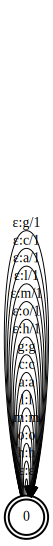

In [55]:
alphabet_input = ['&#949;', 'h','o','m','l','a','c','g']
alphabet_output = ['&#949;', 'o','h','m','l','a','c','g']

alphabet_table_input = fst.SymbolTable(name='words')
alphabet_table_output = fst.SymbolTable(name='words')

for idx,element in enumerate(alphabet_input):
    alphabet_table_input.add_symbol(symbol=element,key=idx)

for idx,element in enumerate(alphabet_output):
    alphabet_table_output.add_symbol(symbol=element,key=idx)
    
fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

for l in alphabet_input:
    print >> fr_model_tranducer_compiler, "0 0 %d %d 0" % (alphabet_input.index(l),alphabet_output.index(l))

for l in alphabet_input[1:]:
    print >> fr_model_tranducer_compiler, "0 0 0 %d 1" % (alphabet_output.index(l))
print >> fr_model_tranducer_compiler, "0"

add_fst_new = fr_model_tranducer_compiler.compile()
add_fst_new.set_input_symbols(alphabet_table_input)
add_fst_new.set_output_symbols(alphabet_table_output)

a) I have built the full edit distance operator  for the given vocabulary through this loop.

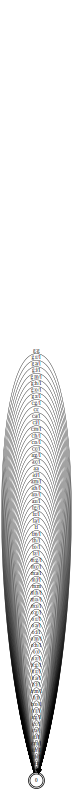

In [56]:
#full graph
fr_model_tranducer_compiler = fst.Compiler(acceptor=False)

for l1 in alphabet_input:
    for l2 in alphabet_output:
        if l1!=l2:
            print >> fr_model_tranducer_compiler, "0 0 %d %d 1" % (alphabet_input.index(l1),alphabet_output.index(l2))
        if l1==l2:
            print >> fr_model_tranducer_compiler, "0 0 %d %d 0" % (alphabet_input.index(l1),alphabet_output.index(l2))

print >> fr_model_tranducer_compiler, "0"

add_fst_new = fr_model_tranducer_compiler.compile()
add_fst_new.set_input_symbols(alphabet_table_input)
add_fst_new.set_output_symbols(alphabet_table_output)


a) I have built a fst which returns as weights the cost associated with an operation. If you have to substitute two letters, then the cost will be one, if you have to add one letter the cost is one, and finally if you have to delete one letter the cost is one as well.

As we can see the size of the WFST is growing in $O(n^2)$ with respect to the size of the vocabulary $\Sigma$. In order to reduce the memory needed to compute the operation we can add states and or compositions using the innherent transitivity : change the letter 'a' to 'b' is equivalent to change 'a' to 'c' and then 'c' to 'b'. We would have more states but we will save the computation of somee edges using taking advantage of the transitivity.

In order to reduce the shortest path problem, the best algorithm when weights are positive in my knowledge is Djikstra. This algorithm is quite efficient and returns the cost associated with the shortest path.

b) I have first built the FSA that represent the dictionnary

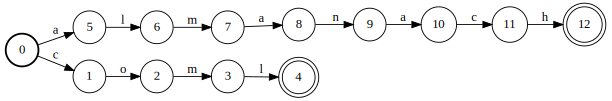

In [58]:
list_char = list(set('cogmlcomlalmanachlomhcomlllamanachcocoml'))
dict_char = ['<epsilon>'] + list_char

dict_words = ['coml','almanach']


text_words = 'cogml coml almanach lomh comll lamanach cocoml'.split()

dict_table = fst.SymbolTable(name='words')

for idx,element in enumerate(dict_char):
    dict_table.add_symbol(symbol=element,key=idx)

arrive = 1 
fr_model_tranducer_compiler_1 = fst.Compiler(acceptor=True)

for l in dict_words:
    depart = 0
    for ch in l:
        print >> fr_model_tranducer_compiler_1, "%d %d %d" % (depart,arrive,dict_char.index(ch))
        depart = arrive
        arrive = arrive+1
        
    print >> fr_model_tranducer_compiler_1, "%d" %(depart)

fst_dict = fr_model_tranducer_compiler_1.compile()
fst_dict.set_input_symbols(dict_table)
fst_dict.rmepsilon()

b) Then I have built the FSA that represents the words in the text

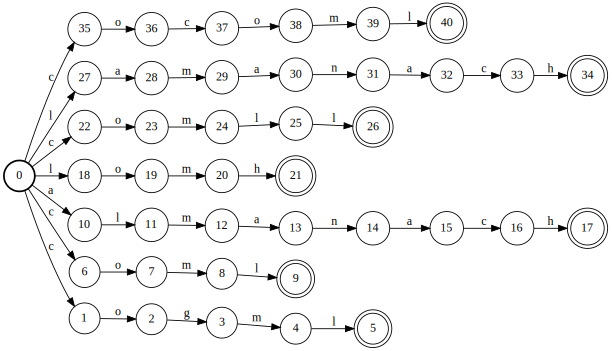

In [59]:
list_char = list(set('cogmlcomlalmanachlomhcomlllamanachcocoml'))
dict_char = ['<epsilon>'] + list_char

text_words = 'cogml coml almanach lomh comll lamanach cocoml'.split()

dict_table = fst.SymbolTable(name='words')

for idx,element in enumerate(dict_char):
    dict_table.add_symbol(symbol=element,key=idx)

arrive = 1 
fr_model_tranducer_compiler_2 = fst.Compiler(acceptor=True)

for l in text_words:
    depart = 0
    for ch in l:
        print >> fr_model_tranducer_compiler_2, "%d %d %d" % (depart,arrive,dict_char.index(ch))
        depart = arrive
        arrive = arrive+1
        
    print >> fr_model_tranducer_compiler_2, "%d" %(depart)

fst_text = fr_model_tranducer_compiler_2.compile()
fst_text.set_input_symbols(dict_table)
fst_text.rmepsilon()

b) Finaly I did the composition and then the difference in order to obtain to have the graph with the mispelled words 

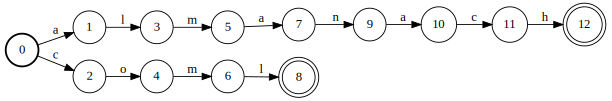

In [61]:
f_compose = fst.compose(fst_dict,fst_text)
f_compose

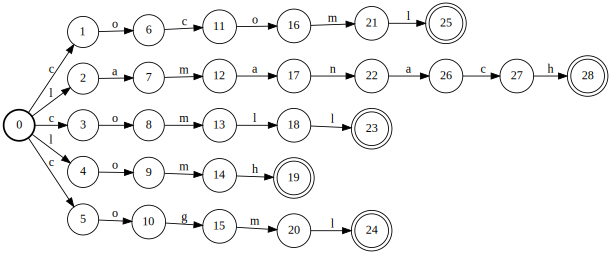

In [62]:
f2_deterministic = f_compose.copy()
f2_deterministic = fst.determinize(f2_deterministic)
diff =fst.difference(fst_text,f2_deterministic)
diff

c) In order to correct the mispelled error we could use the Edit distance. Using the edit distance we have a metric that says which word in the dictionnary is the closest to the one that we are checking in the text. Hence, we could correct a mispelled word in the text by replacing it by the word that is the closest to him among the dictionnary. 

d) If we have a confusion matrix that says which spelling errors are the most common, we can adapt our WFST Edit distance to detect spelling errors. Instead of using 0/1 weights we can use weights that are function of the cost given by the confusion matrix in order to less penalize common errors (for instance inverse of the coefficient in the confusion matrix). Hence, we have defined a new distance that will penalize less the common mistakes. Hence a word with a common error would be really close to the correct one with respect to this edit distance. When we will want to correct a word the words that would be really close to its in the dictionnary would be the ones that are obtained by removing a common mistake from the original mispelled word.

### II) Kaldi / Abkhazia

The goal of this part is to train different language models, and understand the influence of the parameters. This exercice is more open and we wait explanations and interpretations of the results.

Kaldi is a C++ library developed by John Hopkins University, and is used by several of the main assistants, Siri of Apple, Alexa of Amazon.
Abkhazia is a python library around Kaldi for an easier use.

#### Exercice 3 Language models and N-grams
One acoustic model has been pre-trained, at word level. You can see the paramaters of the acoustic model with the command `help(abkhazia.acoustic)`.  

Below, you will find commands to 1) Load the corpus 2) Train a simple lanugage model 3) Decode a corpus with it
You can find the models here : `/home/vagrant/models`
You can have access to all parameters for the language model with `help(abkhazia.language)` 
You can find find the results per utterance here : `decode/scoring_kaldi/wer_details/per_utt`

a) Can you explain the parameters based on the lecture class?

b) Can you try different the different pre-trained acoustic models?

c) What are the more important parameters for the model, what are the advantages and drawbacks of different modelizations? Complexity, Sparsity, Time computations, etc...

d) Can you vizualize some parts of the grammar `G.fst` for one of your experiment and explain in terms of Weigthed Finite State Transducers the parameters.

e) Bonus: What is `L.fst`? 

f) Can you make a quick summary of the whole pipeline to have an ASR system?

a) The parameters of the accoustic model are described as:
(0- Features)
 1- Monophone GMM
 2- Triphone speaker independent HMM-GMM
 3- Triphone speaker adapted HMM-GMM
 4- Triphone HMM-DNN
 
 As described in the second class, the acoustic model that aims at estimating the quantity $p(X|W)$ (where $X$ is a sequence of features and $W$ the sequence of words) is usualy decomposed as the quantity:
 $p(X|W) = \sum_{Q} P(X|Q)P(Q|W)$ where Q represents the set of all the valid pronunciations.
 
 We need to model $P(X|Q)$. Hence, the four proposed alternative are ways to model the sequence conditioned on a sequence of symbols. The first and the simpliest model would be to describe this quantity as a GMM. The more classical ways of modelling are based on Hidden markov models. When using a HMM one also need to model the observed data/speech features, hence GMM and DNN are two ways of doing that. Finally we can choose between monophone based models or triphone based models, monophone only treats phonemes separetely while triphone treats the phonemes by set of three in order to deal with co articulation.
 
For the 'language model' module I can't find any parameters but it represents how likely each words are (used in the bayesian rule in order to compute $P(W[X) = P(W) P(X|W)$ that is the quantity that we are really looking for).
For the class LanguageModel there is various parameters : 'level' allows to work using the phoneme level or the word level (probability to see phonemes or words) , 'order' represent  the n in n-grams: if we consider words or phonemes alone or with the n words preceding it. The corpus parameter corresponds to the text from which we want to learn our modelization for the language model. The silence probability parameter allows to admit a probability to have silence in order to classify some sounds (noises) as silence.


b) I tried to change various parameters of the language model and use various accoustic pretrained model. However, I didn't succeed to run the code using 'am_trisa_phone' acoustic model the parameter 'position_dependent_phones' set to True. I also tried to train different acoustic models on the provided corpus but I didn't succeed to make them work (see code below). 


|Computation (Language model/decode)              |   Acoustic pretrained model      |        Language Model Level    |  n in n-gram| WER | position_dependent_phones| silence_probability
|--------------|----------------|-----------------|----------------|-----------------|----------------|-----------------|
|1.6544919014s/112.173303127s|am_trisa_word|phone|2|317.54%|False|0.5|
|4.7054131031/128.954365969|am_trisa_word|phone|4|340.35%|False|0.5|
|4.4967648983/80.0081369877|am_trisa_word|word|2|1.57%|False|0.5|
|3.84742116928/84.5580580235|am_trisa_word|word|1|10.78%|False|0.5|
|5.87439703941/88.1717100143|am_trisa_word|word|3|0.81%|False|0.5|
|5.59424209595/92.6833870411|am_trisa_word|word|4|0.75%|False|0.5|
|5.41507196426/96.3703789711|am_trisa_word|word|5|0.75%|False|0.5|
|8.92690515518/102.913853884|am_trisa_word|word|10|0.19%|False|0.5|
|3.83507013321/85.3084468842|am_trisa_word|word|2|1.50%|False|0.4|
|4.68054986/86.460162878|am_trisa_word|word|2|1.50%|False|0.2|
|3.79040813446/95.3713359833|am_trisa_word|word|2|1.72%|False|0.7|
|3.57745218277/102.301707029|am_trisa_word|word|2|22.90%|False|0|


Because the dataset is pretty small using word level models allow to quite improve the outcome. Using a  low n in n-gram parameter decrease significantly the outcome.  But by setting a really high n in n gramùs and a word representation we are overfitting the training set, we should have a look at the WER on a test set. For instance 10 as a n in n-grams is way too large. One has to find a good trade off between bias and variance. I think that usualy we are working at phone level with 2 or 3 as n in n-grams.




c) I'm not sure to have well understood the question.
For the language model, using phone level allows to have more accurate and low level representation, but it's really costly, one need lots of training data to make it performs decently. Word level requires less training examples but it's more difficult to make a difference between different pronunciations of the same word.
As described in class, using a high n in n-gram is more accurate as well but requires tons of examples to work efficiently.

For the accoustic model, I haven't succeed to use different accoustic models but as described in the documentation there is an hierarchy between the modelizations :  Monophone GMM<Triphone speaker independent HMM-GMM< Triphone speaker adapted HMM-GMM< Triphone HMM-DNN. The higher we are going in this hierarchy the more complex,the less sparse and the more time consuming is the training operation. In order to compute Triphone speaker adapted HMM-GMM one need to compute first Monophone GMM and Triphone speaker independent HMM-GMM.

d) e) I didn't understand what was asked. But because we are dealing with a probability based framework we can construct a WFST based on a learn pununciation dictionary and a language model as described in class.

f) ASR is based on a multi-stage pipeline. The problem is divide between an acoustic model and a language model modelization. Language model describes the probability of appearance of each words. 
The acoustic model gives the probability to have a given set of feature conditioned to the word.

In order to obtain this acoustic model distribution we have multiple steps. The one used as the top level modelization in the acoustic models of the librairy works as follow:

First as input, one have an audio signal as a wav file data.
One can preprocess it or not (end-to-end DL) using MFCC or melfilter bank as described in the previous class.
Then the acoustic model probability is usually given by multiple HMMs (or GMM as described above) that describes the possible Triphones or Monophones. The observed state appearance probabilities in the HMM are given either by GMM or a Deep Neural network. The Hidden Markov Model is training with GMM model for emissions, viterbi is used to extract an alignment of features frames with states. Finally a Neural Network is trained to predict each state from its frame.   

Using the HMMs that we have constructed we can use a viterbi search in order to find the most probable monophone or triphone in our dictionnary. Then we will have a graph of lots of potential phoneme accepted sequences with some probabilities. One will have to perform another Viterbi decoding in order to find the full sequence with the highest probability.

Finally using the language model and the acoustic model as described in the question b) we can compute the most probable transcription of our audio.



In [1]:
import abkhazia
import abkhazia.acoustic
import abkhazia.language


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
import abkhazia.utils as utils
import abkhazia.commands.abstract_command 
import abkhazia.corpus 

In [72]:
from time import time
corpus_dir = "/home/vagrant/models/corpus_francais/data"
output_dir_lm = "/home/vagrant/models/exp23_example/language_model"

log = abkhazia.utils.logger.get_log(
    os.path.join(output_dir_lm, 'language.log'), verbose=True)

nngram = 10
position_dependent_phones = False
silence_probability = 0.5
level_lang = 'word'
t = time()
## Load corpus in abkhazia format
corpus = abkhazia.corpus.Corpus.load(corpus_dir, validate=True, log=log)
## Instanciate the lm recipe and compute the LM
recipe = abkhazia.language.LanguageModel(
    corpus, output_dir_lm, log=log,
    order=nngram, level=level_lang,
    position_dependent_phones=position_dependent_phones,
    silence_probability=silence_probability)
recipe.delete_recipe = False
recipe.compute()
elapsed = time() - t


In [46]:

#Train accoustic model
corpus_dir = "/home/vagrant/models/corpus_francais/data"
output_dir_lm = "/home/vagrant/models/Trained_Monophone_model3"
features = "/home/vagrant/models/features"

corpus = abkhazia.corpus.Corpus.load(corpus_dir, validate=True, log=log)

log = abkhazia.utils.logger.get_log(
    os.path.join(output_dir_lm, 'language.log'), verbose=True)

lang_args = {}
lang_args['level'] = 'phone'
lang_args['position_dependent_phones']= False
lang_args['silence_probability'] = 0.5
lang_args['keep_tmp_dirs'] = False

am = abkhazia.acoustic.Monophone(corpus=corpus, feats_dir=features, output_dir=output_dir_lm, log=log,lang_args=lang_args)
am.delete_recipe = False
am.compute()


In [73]:
## Decode step
# paths
corpus = "/home/vagrant/models/corpus_francais"
features = "/home/vagrant/models/features"
acoustic = "/home/vagrant/models/am_trisa_word"
output_dir_decode = "/home/vagrant/models/exp23_example/decode"
# corpus is different from corpus_dir as the line commands adss automaticaly '/data/'
accoustic_model = acoustic.split('/')[-1]

t2 = time()

# command
cmd = ["abkhazia", "decode", "sa", corpus,
       "-o", output_dir_decode, "-l", output_dir_lm,
       "-f", features, "-a", acoustic, "--recipe",
       "--verbose",'--force']
print ' '.join(cmd)
process = subprocess.Popen(cmd, shell=False)
process.wait()
elapsed2 = time() - t2



In [74]:
with open('txt.txt','w') as f:
    f.write('|'+str(elapsed)+'/'+str(elapsed2)+'|'+accoustic_model+'|'+level_lang+'|'+str(nngram)+'||'+str(position_dependent_phones)+'|'+str(silence_probability)+'|')